In [3]:
import numpy as np
import pandas as pd

# **Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
local_path = "drive/MyDrive/Colab Notebooks/ImageProcessing/"

In [5]:
train = pd.read_csv(local_path + "train.csv")
test = pd.read_csv(local_path + "test.csv")

In [6]:
X = train.drop('label' , axis = 1).to_numpy()
y = np.array(train['label']).flatten()

# **Image Visualisation**

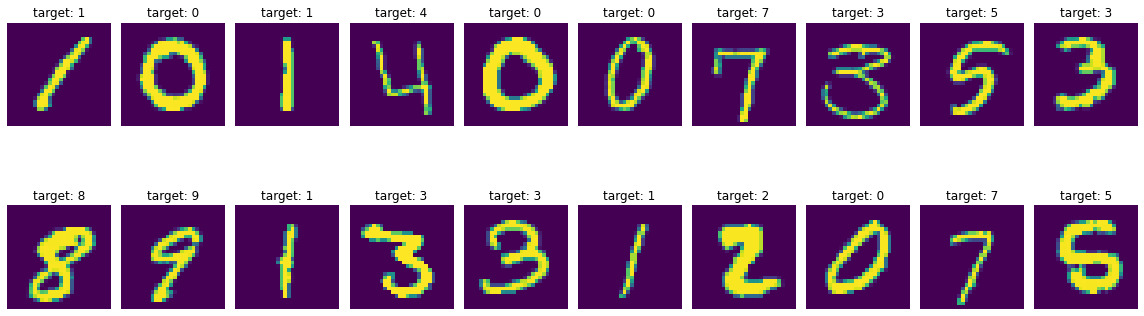

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(X[i].reshape(28,28));
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {y[i]}") 
plt.tight_layout()

# **Outlier Detection**

In [8]:
from sklearn.ensemble import IsolationForest
Outlier_Detector = IsolationForest()

We want to identify the outliers of each class

In [9]:
outliers = []
for i in range(10):
    i_index = train[train.label==i].index
    i_outliers = i_index[Outlier_Detector.fit_predict(X[i_index]) == -1]
    outliers.append(i_outliers)

In [10]:
for i in range(10):
    i_class = sum(y == i)
    print(f"on number {i} class there is {round(len(outliers[i]) / i_class * 100, 2)} % outliers")

on number 0 class there is 18.66 % outliers
on number 1 class there is 5.49 % outliers
on number 2 class there is 9.7 % outliers
on number 3 class there is 14.39 % outliers
on number 4 class there is 6.36 % outliers
on number 5 class there is 12.25 % outliers
on number 6 class there is 16.22 % outliers
on number 7 class there is 8.32 % outliers
on number 8 class there is 17.84 % outliers
on number 9 class there is 11.13 % outliers


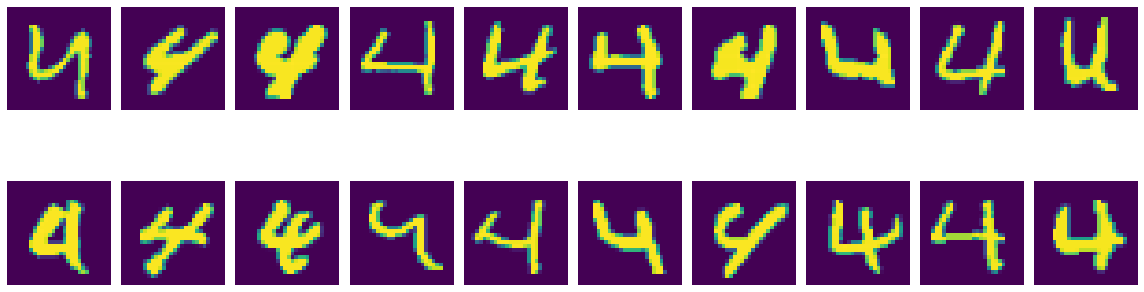

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for _ in range(20):
    i = outliers[4][_]
    axes[_//10, _ %10].imshow(X[i].reshape(28,28))
    axes[_//10, _ %10].axis('off') 
plt.tight_layout()

In [15]:
import itertools
remove_index = list(itertools.chain.from_iterable(outliers))

In [18]:
train_remove_outlier = train.drop(remove_index)

In [19]:
X = train_remove_outlier.drop('label' , axis = 1).to_numpy()
y = np.array(train_remove_outlier['label']).flatten()

# **Dimension reduction**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data.shape)

(36989, 784)


In [21]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

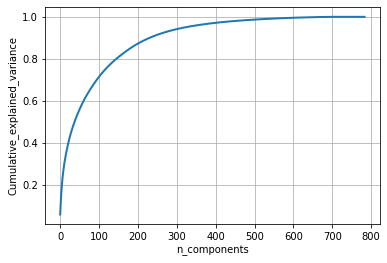

In [22]:
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# **Classification**

In [16]:
#standardized_data

In [24]:
from sklearn import decomposition
pca = decomposition.PCA()

In [39]:
pca.n_components = 40
X_reduced = pca.fit_transform(standardized_data)

In [40]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.15, random_state=42)

In [41]:
from sklearn import datasets, svm, metrics
import datetime as dt

classifier = svm.SVC(kernel='linear', decision_function_shape="ovo")

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2022-07-08 17:53:40.973154
Stop learning 2022-07-08 17:54:01.506513
Elapsed learning 0:00:20.533359


In [42]:
metrics.accuracy_score(y_test, classifier.predict(X_test))

0.9437736529104344

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


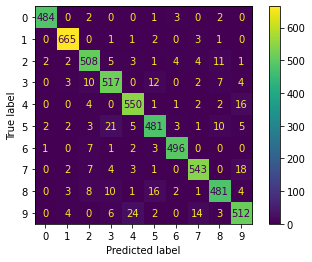

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test);

# **Pipeline**

In [44]:
from sklearn.pipeline import Pipeline
infer_pipeline = Pipeline([
                  ('scaler',scaler),
                  ('pca', pca),
                  ('classifier', classifier)
                  ])

In [45]:
X_ = test.to_numpy()

In [46]:
infer_pipeline.predict(X_)

array([2, 0, 9, ..., 3, 9, 2])